# Pandas and Seaborn

Pandas is a Python library that provides data structures and data analysis tools. Seaborn is a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics. In this notebook, we will explore the basics of Pandas and Seaborn.

We will use what we've learned about numpy and matplotlib, because pandas and seaborn are built on top of numpy and matplotlib, respectively. This means that we can use numpy arrays and matplotlib plots with pandas and seaborn, and they will work seamlessly together.

Let's start by installing and importing the necessary libraries.

In [ ]:
# only need to do this once per Colab session
!pip install -q pandas seaborn

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pandas

you can see `pandas` as a 'wrapper' around `numpy`, which makes it easier to keep track of what your data represents: it provides data structures and data analysis tools. The main data structures in `pandas` are `Series` and `DataFrame`. Let's make some, just to try stuff out. 

### Series

A `Series` is a one-dimensional array-like object containing an array of data and an associated array of data labels, called its index. The simplest `Series` is formed from only an array of data, like this:


In [2]:
sery = pd.Series(np.random.randn(1000), index=np.linspace(0, 10, 1000, endpoint=False))

And in principle the `sery` variable is nothing more than a `numpy` array, but with an index. This means we can use `numpy` functions on it and plot it using `matplotlib`, but we can also use the index to access elements for added flexibility.

When plotting these `Series` objects, `matplotlib` immediately recognizes the index as the x-axis, which is very convenient.

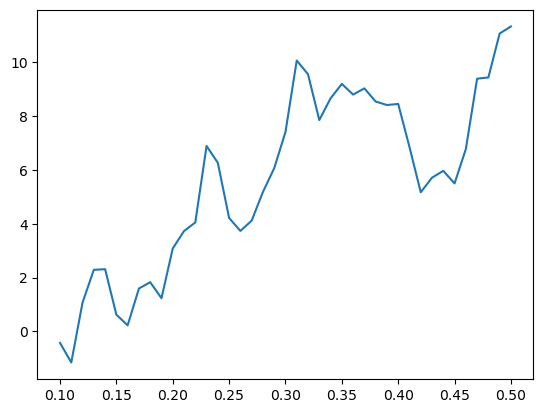

In [3]:
# here we index the series by the time index, which is a float
# then we use a numpy function (cumsum) on it, which returns a numpy array
# finally, we plot the numpy array
# this is a common pattern in pandas, where you use numpy functions on pandas objects
# and then plot the result

plt.plot(sery[0.1:0.5].cumsum())

<Axes: >

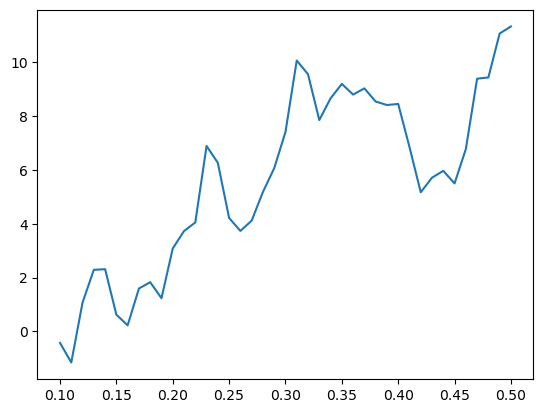

In [4]:
# for extra handiness you can use the .plot method on the series itself

sery[0.1:0.5].cumsum().plot()

See what pandas did for us here? Now we can use a meaningful index instead of a meaningless integer index. This is the power of pandas: it makes it easier to keep track of what your data represents.

This works especially well when working with times and dates, which is a common use case for pandas. Let's see how that works.

<Axes: >

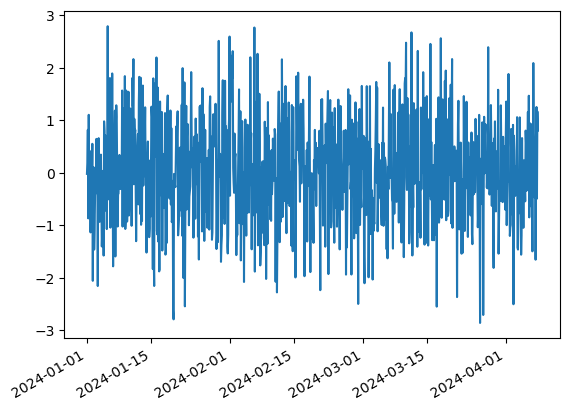

In [5]:
date_sery = pd.Series(np.random.randn(1000),
          index=pd.date_range(start='1/1/2024',
                              end='4/08/2024',
                              periods=1000)
        )
date_sery.plot()

And when working with time, we can use boolean indexing to select periods of dates / times. This is very powerful, because it allows us to easily select data from a certain period.

<Axes: >

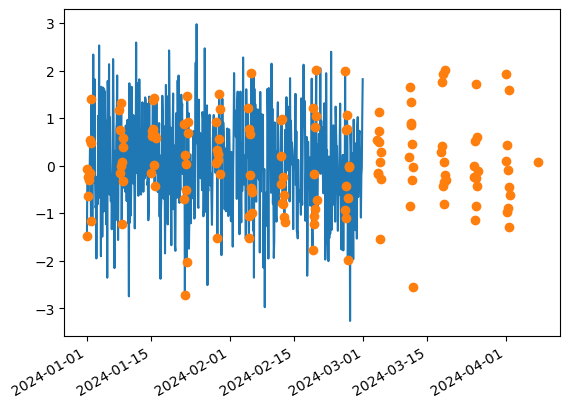

In [21]:
# plot everything that happened before March first
date_sery[date_sery.index < "2024-3-1"].plot()
# plot everything that happened on Mondays
date_sery[date_sery.index.dayofweek == 0].plot(marker='o', lw=0)

<div class='alert alert-warning'>
<b>ToDo</b> (1 point)
</div>

From `date_sery`, plot the histogram of values that are greater than 0.5, and that happened on either Wednesday or Friday. You will need to combine multiple boolean indexes using the `&` operator. **Mind the brackets!**

In [11]:
# Implement the ToDo here

# your solution here


### DataFrames


A `DataFrame` represents a tabular, spreadsheet-like data structure containing an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The `DataFrame` has both a row and column index; it can be thought of as a dictionary of `Series` all sharing the same index.

We can create a `DataFrame` from a numpy array like this, by explicitly naming the index and columns as arguments when creating the `DataFrame`:

In [14]:
df = pd.DataFrame(np.random.randn(1000, 4),
             index=date_sery.index,
             columns=list('ABCD'))

Or from a dictionary of `Series` objects, like this:

In [34]:
df = pd.DataFrame({col: pd.Series(np.random.randn(1000)+np.random.randint(1,10),
                            index=date_sery.index) for col in list('ABCD')})

Plotting `DataFrames` is very quick, and has reasonable defaults which take care of the axis labeling and legend for you: way nicer than having to do this yourself in `numpy`, right? 

<Axes: >

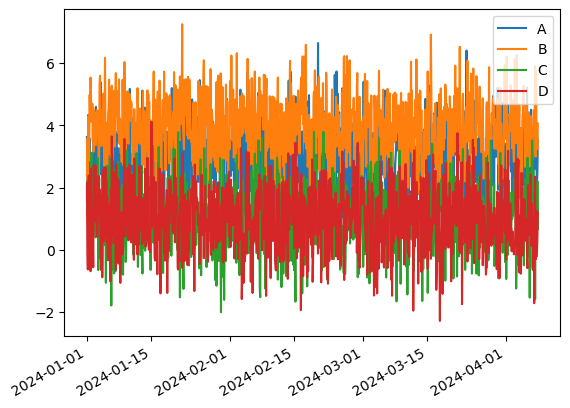

In [16]:
df.plot()

But it's also very easy to get an easy-to-read representation of the numbers:

In [20]:
df.head(10)

,A,B,C,D
2024-01-01 00:00:00.000000000,3.629210,1.563000,1.126387,2.138006
2024-01-01 02:21:15.675675675,2.090135,3.572430,2.213602,-0.206843
2024-01-01 04:42:31.351351351,1.714444,2.349047,1.302176,-0.624559
2024-01-01 07:03:47.027027027,4.336827,4.293285,0.019209,0.174217
2024-01-01 09:25:02.702702702,1.870241,3.939367,1.133408,2.392004
2024-01-01 11:46:18.378378378,3.348436,2.876599,0.316377,0.284954
2024-01-01 14:07:34.054054054,3.578228,4.981478,0.303275,1.206121
2024-01-01 16:28:49.729729729,3.061450,4.145511,0.232700,0.446022
2024-01-01 18:50:05.405405405,3.084743,5.534463,-0.231399,-0.681155
2024-01-01 21:11:21.081081081,0.519322,4.638002,2.492138,2.617802


Pandas `DataFrame`s allow us to do intricate indexing operations using the `.loc` operator. For instance, we can select two columns **and** a specific timerange with a single indexing call. 

In [23]:
df.loc["20240102":"20240103", ["A", "B"]]

,A,B
2024-01-02 01:53:52.432432432,1.225312,4.344956
2024-01-02 04:15:08.108108108,2.330411,4.699826
2024-01-02 06:36:23.783783783,1.870506,3.487794
2024-01-02 08:57:39.459459459,3.391281,4.565144
2024-01-02 11:18:55.135135135,3.841483,3.156979
2024-01-02 13:40:10.810810810,3.305649,4.440897
2024-01-02 16:01:26.486486486,3.903091,3.970515
2024-01-02 18:22:42.162162162,2.511251,4.067190
2024-01-02 20:43:57.837837837,0.931718,4.389978
2024-01-02 23:05:13.513513513,4.592570,3.369420


But we can also 'revert' back to a numpy-like indexing, if that is easier with our data, using the `.iloc` operator. 

In [25]:
df.iloc[31:134,-2:]

,C,D
2024-01-04 00:59:05.945945945,0.442784,-0.636713
2024-01-04 03:20:21.621621621,0.692659,1.072966
2024-01-04 05:41:37.297297297,2.312087,1.792109
2024-01-04 08:02:52.972972973,1.815824,-0.876448
2024-01-04 10:24:08.648648648,0.329054,0.381526
...,...,...
2024-01-13 15:42:42.162162162,-0.024469,2.606199
2024-01-13 18:03:57.837837837,1.218866,0.109664
2024-01-13 20:25:13.513513513,2.378782,0.453842
2024-01-13 22:46:29.189189189,0.798927,1.613558


We can also merge `DataFrame`s together using the `pd.concat` function. For example, if we want to select data from two time periods and create a new variable for these:

In [29]:
pd.concat([df.loc["20240101":"20240103", ["A", "B"]],
           df.loc["20240105":"20240107", ["A", "B"]]])

,A,B
2024-01-01 00:00:00.000000000,3.629210,1.563000
2024-01-01 02:21:15.675675675,2.090135,3.572430
2024-01-01 04:42:31.351351351,1.714444,2.349047
2024-01-01 07:03:47.027027027,4.336827,4.293285
2024-01-01 09:25:02.702702702,1.870241,3.939367
...,...,...
2024-01-07 13:44:30.270270270,1.322746,5.097209
2024-01-07 16:05:45.945945946,3.195427,3.762147
2024-01-07 18:27:01.621621621,2.722705,3.800433
2024-01-07 20:48:17.297297297,3.265796,4.362319


#### Advanced use case: Intricate grouping and re-indexing

By coding for example experimental conditions in a DataFrame column, we can group our data by conditions and perform analyses on this. A full treatment of this type of functionality, which can resemble excel-type pivot tables, is out of scope here, I'm afraid. 

You can find a full tutorial on advanced indexing and grouping [here](https://www.datacamp.com/tutorial/pandas-multi-index)

Here's a quick example of how grouping works in a simple analysis one-liner:

In [33]:
group_df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

# and to do a quick analysis on the data in columns C and D for the A conditions:
group_df.groupby('A')[['C','D']].mean()

,C,D
A,,
bar,0.349292,-0.278499
foo,0.039671,0.823346


## Seaborn

Seaborn is a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics. It is intended to work well with pandas DataFrames, making use of the descriptive column and index names. But it can also work with numpy arrays, if you prefer that.

Seaborn has a lot of built-in functionality for creating beautiful plots, and it is very easy to use. It is also very good at applying consistent beautiful styles across all your figures, which is a big plus. Let's see how it works. 

We'll take the DataFrame we had made before to quickly plot some simple aggregate results from it. To do this, we use the `sns.barplot` function, which is a high-level function that takes care of a lot of the details for us.



<Axes: >

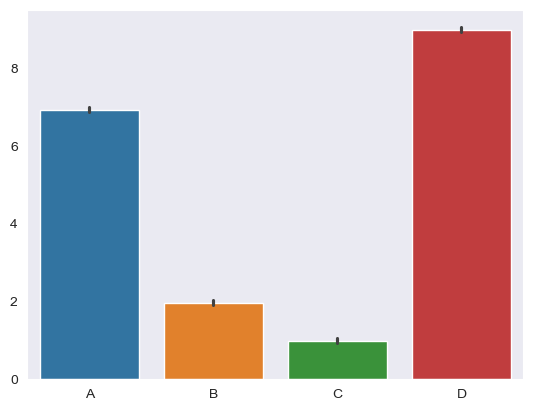

In [51]:
sns.set_style('dark')
sns.barplot(df)

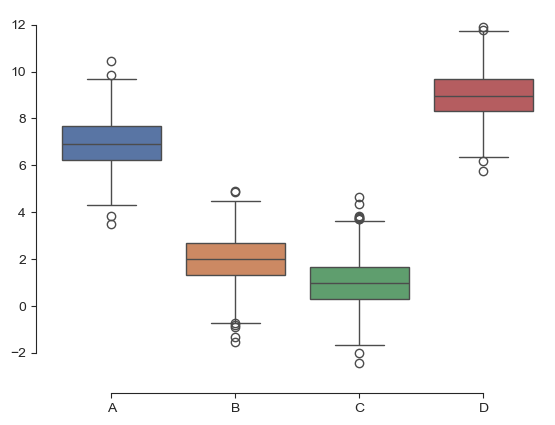

In [57]:
# let's try another style, a different color palette, and offset axes:
sns.set_style("ticks")
sns.boxplot(data=df, palette="deep")
sns.despine(offset=10, trim=True)

This ability to quickly create beautiful plots is what makes Seaborn so powerful, especially for exploratory data analysis. 

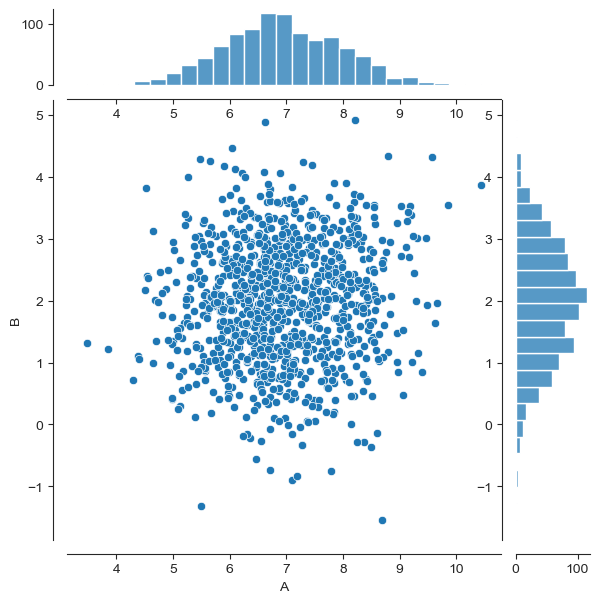

In [58]:
sns.jointplot(x='A', y='B', data=df)
sns.despine(offset=10)

<Axes: >

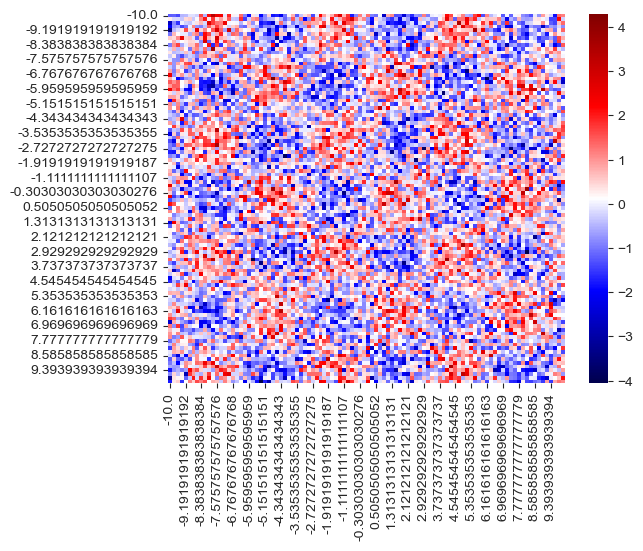

In [59]:
n_pix = 100
rnge = np.linspace(-10, 10, n_pix)
x, y = np.meshgrid(rnge, rnge)

z = np.sin(x) * np.cos(y)

rect_df = pd.DataFrame(np.random.randn(n_pix, n_pix)+z,
                       index=rnge,
                       columns=rnge)

sns.heatmap(rect_df, cmap='seismic')